In [128]:
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pywaffle import Waffle
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np
import altair as alt
from vega_datasets import data

In [129]:
df = pd.read_excel(".\VPMS Database.xlsx")
df.head()

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Street Number,Street Name,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Who Killed Shooter On Scene,Attempt to Flee,Insanity Defense,Criminal Sentence
0,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,110,Inner Campus Dr,...,1.0,3.0,7.0,1.0,"hatchet, hammer, knives, wrench, ropes, water,...",1.0,2.0,0.0,2.0,0.0
1,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,Rose-Mar College of Beauty,N Rose,...,0.0,1.0,1.0,1.0,"knife, nylon cord",2.0,0.0,0.0,1.0,1.0
2,3,Held,Leo,10/23/1967,Monday,23,10,1967,599,S Highland St,...,1.0,3.0,2.0,1.0,holster,1.0,2.0,0.0,2.0,0.0
3,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,11703,Lake Rd,...,0.0,0.0,1.0,0.0,NaN,2.0,0.0,0.0,0.0,3.0
4,5,Lambright,Donald,4/5/1969,Saturday,5,4,1969,NaN,I-76,...,0.0,3.0,2.0,0.0,NaN,0.0,1.0,0.0,2.0,0.0


In [130]:
df.dtypes

Case #                          object
Shooter Last Name               object
Shooter First Name              object
Full Date                       object
Day of Week                     object
                                ...   
On-Scene Outcome               float64
Who Killed Shooter On Scene    float64
Attempt to Flee                float64
Insanity Defense               float64
Criminal Sentence              float64
Length: 153, dtype: object

In [131]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 153 columns):
 #    Column                                       Dtype  
---   ------                                       -----  
 0    Case #                                       object 
 1    Shooter Last Name                            object 
 2    Shooter First Name                           object 
 3    Full Date                                    object 
 4    Day of Week                                  object 
 5    Day                                          int64  
 6    Month                                        int64  
 7    Year                                         int64  
 8    Street Number                                object 
 9    Street Name                                  object 
 10   City                                         object 
 11   State                                        object 
 12   County                                       object 
 13   Zip

In [ ]:
ms_killed = df.groupby(['Number Killed']).Year.count().reset_index()
ms_killed['Number Killed'].sum()

In [ ]:
ms_injured = df.groupby(['Number Injured']).Year.count().reset_index()
ms_injured['Number Injured'].sum()

In [206]:
ms_2023 = df.groupby(['Year']).count()
ms_2023

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Street Number,Street Name,City,...,Interest in Firearms,Firearm Proficiency,Total Firearms Brought to the Scene,Other Weapons or Gear,Specify Other Weapons or Gear,On-Scene Outcome,Who Killed Shooter On Scene,Attempt to Flee,Insanity Defense,Criminal Sentence
Year,,,,,,,,,,,,,,,,,,,,,
1966,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1967,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1968,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1969,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
1970,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1972,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,0,2,2,2,2,2
1973,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1975,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1976,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1


In [132]:
ms_counts = df.groupby(['State']).Year.count().reset_index()
ms_counts

,State,Year
0,AK,3
1,AL,1
2,AR,3
3,AZ,3
4,CA,30
5,CO,9
6,CT,3
7,DC,1
8,FL,13
9,GA,3


In [133]:
ms_per_year = df.groupby(['State']).Year.count().reset_index()
ms_per_year

,State,Year
0,AK,3
1,AL,1
2,AR,3
3,AZ,3
4,CA,30
5,CO,9
6,CT,3
7,DC,1
8,FL,13
9,GA,3


In [134]:
ms_per_year.to_csv('ms_per_year.csv')

In [135]:
ms_per_day = df.groupby(['Day of Week']).State.count().reset_index()
ms_per_day

,Day of Week,State
0,Friday,25
1,Monday,30
2,Saturday,24
3,Saturday/Sunday,1
4,Sunday,25
5,Thursday,27
6,Tuesday,31
7,Wednesday,31


In [332]:
shooters_age = df['Age'].value_counts()
shooters_age

Age
28.0    10
25.0     9
21.0     9
45.0     8
22.0     7
33.0     7
23.0     7
44.0     7
24.0     7
39.0     6
20.0     6
18.0     6
41.0     6
19.0     5
47.0     5
40.0     5
42.0     5
36.0     5
26.0     5
31.0     5
32.0     4
15.0     4
27.0     4
29.0     4
54.0     4
35.0     4
34.0     4
43.0     3
51.0     3
46.0     2
64.0     2
38.0     2
37.0     2
17.0     2
50.0     2
48.0     2
66.0     2
60.0     1
16.0     1
57.0     1
56.0     1
52.0     1
70.0     1
53.0     1
13.0     1
11.0     1
59.0     1
62.0     1
55.0     1
72.0     1
Name: count, dtype: int64

In [136]:
ms_per_day.to_csv('ms_per_day.csv')

In [137]:
df['Full Date'] = pd.to_datetime(df['Full Date'], format="%m/%d/%Y", errors='coerce')
df['Full Date'].index
print(df['Full Date'])

0     1966-08-01
1     1966-11-12
2     1967-10-23
3     1968-03-16
4     1969-04-05
         ...    
189   2023-01-21
190   2023-01-23
191   2023-03-27
192   2023-04-10
193   2023-05-06
Name: Full Date, Length: 194, dtype: datetime64[ns]


In [138]:
dates_frequencies = df['Full Date'].diff()
dates_frequencies

0          NaT
1     103 days
2     345 days
3     145 days
4     385 days
        ...   
189    60 days
190     2 days
191    63 days
192    14 days
193    26 days
Name: Full Date, Length: 194, dtype: timedelta64[ns]

In [139]:
df2 = df[['Case #','State','Full Date','Day','Month','Year']].copy()
df2

,Case #,State,Full Date,Day,Month,Year
0,1,TX,1966-08-01,1,8,1966
1,2,AZ,1966-11-12,12,11,1966
2,3,PA,1967-10-23,23,10,1967
3,4,MI,1968-03-16,16,3,1968
4,5,PA,1969-04-05,5,4,1969
...,...,...,...,...,...,...
189,191,CA,2023-01-21,21,1,2023
190,192,CA,2023-01-23,23,1,2023
191,193,TN,2023-03-27,27,3,2023
192,194,KY,2023-04-10,10,4,2023


In [140]:
df2['date_diff'] = dates_frequencies
df2

,Case #,State,Full Date,Day,Month,Year,date_diff
0,1,TX,1966-08-01,1,8,1966,NaT
1,2,AZ,1966-11-12,12,11,1966,103 days
2,3,PA,1967-10-23,23,10,1967,345 days
3,4,MI,1968-03-16,16,3,1968,145 days
4,5,PA,1969-04-05,5,4,1969,385 days
...,...,...,...,...,...,...,...
189,191,CA,2023-01-21,21,1,2023,60 days
190,192,CA,2023-01-23,23,1,2023,2 days
191,193,TN,2023-03-27,27,3,2023,63 days
192,194,KY,2023-04-10,10,4,2023,14 days


In [141]:
df2['date_diff'] = df2['date_diff'].astype(str)

In [142]:
df2['date_diff'] = df2['date_diff'].str.replace('days', '')
df2

,Case #,State,Full Date,Day,Month,Year,date_diff
0,1,TX,1966-08-01,1,8,1966,NaT
1,2,AZ,1966-11-12,12,11,1966,103
2,3,PA,1967-10-23,23,10,1967,345
3,4,MI,1968-03-16,16,3,1968,145
4,5,PA,1969-04-05,5,4,1969,385
...,...,...,...,...,...,...,...
189,191,CA,2023-01-21,21,1,2023,60
190,192,CA,2023-01-23,23,1,2023,2
191,193,TN,2023-03-27,27,3,2023,63
192,194,KY,2023-04-10,10,4,2023,14


In [143]:
df2.to_csv('dates_diff.csv')

In [144]:
conditions = [
    (df['Year'] <= 1976),
    (df['Year'] > 1976) & (df['Year'] <= 1986),
    (df['Year'] > 1986) & (df['Year'] <= 1996),
    (df['Year'] > 1996) & (df['Year'] <= 2006),
    (df['Year'] > 2006) & (df['Year'] <= 2016),
    (df['Year'] > 2016)
    ]

values = ['tier_6','tier_5','tier_4', 'tier_3', 'tier_2', 'tier_1']

df2['tier'] = np.select(conditions, values)
df2

,Case #,State,Full Date,Day,Month,Year,date_diff,tier
0,1,TX,1966-08-01,1,8,1966,NaT,tier_6
1,2,AZ,1966-11-12,12,11,1966,103,tier_6
2,3,PA,1967-10-23,23,10,1967,345,tier_6
3,4,MI,1968-03-16,16,3,1968,145,tier_6
4,5,PA,1969-04-05,5,4,1969,385,tier_6
...,...,...,...,...,...,...,...,...
189,191,CA,2023-01-21,21,1,2023,60,tier_1
190,192,CA,2023-01-23,23,1,2023,2,tier_1
191,193,TN,2023-03-27,27,3,2023,63,tier_1
192,194,KY,2023-04-10,10,4,2023,14,tier_1


In [145]:
grouped = df2.groupby(['tier'])

In [146]:
decade1 = grouped.get_group("tier_6")
decade2 = grouped.get_group("tier_5")
decade3 = grouped.get_group("tier_4")
decade4 = grouped.get_group("tier_3")
decade5 = grouped.get_group("tier_2")
decade6 = grouped.get_group("tier_1")

In [147]:
decade1.loc[0,'date_diff'] = 0
decade1

,Case #,State,Full Date,Day,Month,Year,date_diff,tier
0,1,TX,1966-08-01,1,8,1966,0,tier_6
1,2,AZ,1966-11-12,12,11,1966,103,tier_6
2,3,PA,1967-10-23,23,10,1967,345,tier_6
3,4,MI,1968-03-16,16,3,1968,145,tier_6
4,5,PA,1969-04-05,5,4,1969,385,tier_6
5,6,NY,1970-09-23,23,9,1970,536,tier_6
6,7,NC,1972-05-29,29,5,1972,614,tier_6
7,8,NJ,1972-06-21,21,6,1972,23,tier_6
8,9,LA,1973-01-07,7,1,1973,200,tier_6
9,10,CA,1975-03-02,2,3,1975,784,tier_6


In [155]:
decade1['date_diff'] = decade1['date_diff'].astype(np.int64)
decade2['date_diff'] = decade2['date_diff'].astype(np.int64)
decade3['date_diff'] = decade3['date_diff'].astype(np.int64)
decade4['date_diff'] = decade4['date_diff'].astype(np.int64)
decade5['date_diff'] = decade5['date_diff'].astype(np.int64)
decade6['date_diff'] = decade6['date_diff'].astype(np.int64)

C:\Users\federicodt\AppData\Local\Temp\ipykernel_10156\2039663385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade1['date_diff'] = decade1['date_diff'].astype(np.int64)
C:\Users\federicodt\AppData\Local\Temp\ipykernel_10156\2039663385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade2['date_diff'] = decade2['date_diff'].astype(np.int64)
C:\Users\federicodt\AppData\Local\Temp\ipykernel_10156\2039663385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [172]:
decade1

,Case #,State,Full Date,Day,Month,Year,date_diff,tier
0,1,TX,1966-08-01,1,8,1966,0,tier_6
1,2,AZ,1966-11-12,12,11,1966,103,tier_6
2,3,PA,1967-10-23,23,10,1967,345,tier_6
3,4,MI,1968-03-16,16,3,1968,145,tier_6
4,5,PA,1969-04-05,5,4,1969,385,tier_6
5,6,NY,1970-09-23,23,9,1970,536,tier_6
6,7,NC,1972-05-29,29,5,1972,614,tier_6
7,8,NJ,1972-06-21,21,6,1972,23,tier_6
8,9,LA,1973-01-07,7,1,1973,200,tier_6
9,10,CA,1975-03-02,2,3,1975,784,tier_6


tier
tier_1    Axes(0.125,0.11;0.775x0.77)
tier_2    Axes(0.125,0.11;0.775x0.77)
tier_3    Axes(0.125,0.11;0.775x0.77)
tier_4    Axes(0.125,0.11;0.775x0.77)
tier_5    Axes(0.125,0.11;0.775x0.77)
tier_6    Axes(0.125,0.11;0.775x0.77)
Name: date_diff, dtype: object

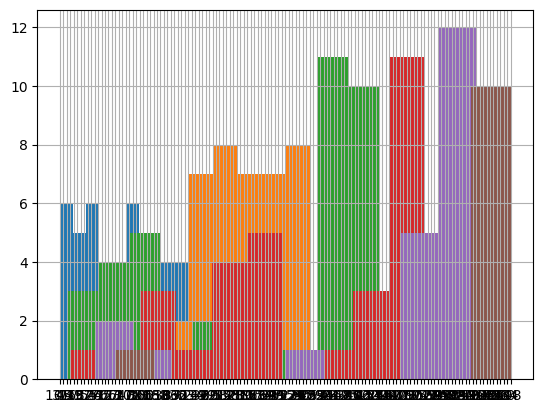

In [215]:
df2.groupby(by='tier').date_diff.hist()

In [323]:
source = pd.DataFrame({
    '1966-1976': decade1['date_diff'],
    '1977-1986': decade2['date_diff'],
    '1987-1996': decade3['date_diff']
  
})

alt.Chart(source).transform_fold(
    ['1966-1976', '1977-1986', '1987-1996'],
    as_=['Decades', 'Days between mass shootings']
).mark_bar(
    opacity=0.3,
    binSpacing=0
).encode(
    alt.X('Days between mass shootings:Q').bin(maxbins=10),
    alt.Y('count()', title='Frequency').scale(domain=(0, 28)).stack(None),
    color=alt.Color('Decades:N').title("Decades")
).properties(width=500, height=500).configure_axis(labelFontSize=15, titleFontSize=15).configure_legend(titleFontSize=15, labelFontSize=15) 

alt.Chart(...)

In [304]:
source = pd.DataFrame({
    '1997-2006': decade4['date_diff'],
    '2007-2016': decade5['date_diff'],
    '2017-2023': decade6['date_diff']
  
})

alt.Chart(source).transform_fold(
    ['1997-2006', '2007-2016', '2017-2023'],
    as_=['Decades', 'Days between mass shootings']
).mark_bar(
    opacity=0.3,
    binSpacing=0
).encode(
    alt.X('Days between mass shootings:Q').bin(maxbins=10),
    alt.Y('count()', title='Frequency').stack(None),
    color=alt.Color('Decades:N').title("Decades")
).properties(width=500, height=500).configure_axis(labelFontSize=15, titleFontSize=15).configure_legend(titleFontSize=15, labelFontSize=15) 

alt.Chart(...)

In [272]:
import altair as alt
from vega_datasets import data

source = df2

gaussian_jitter = alt.Chart(source, title='Normally distributed jitter').mark_circle(size=8).encode(
    y="tier:N",
    x="date_diff:Q",
    yOffset="jitter:Q",
    color=alt.Color('tier:N').legend(None)
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter="sqrt(-2*log(random()))*cos(2*PI*random())"
)

uniform_jitter = gaussian_jitter.transform_calculate(
    # Generate uniform jitter
    jitter='random()'
).encode(
    alt.Y('tier:N').axis(None)
).properties(
    title='Uniformly distributed jitter'
)

(gaussian_jitter | uniform_jitter).resolve_scale(yOffset='independent')

alt.HConcatChart(...)

In [179]:
decade1.dtypes

Case #               object
State                object
Full Date    datetime64[ns]
Day                   int64
Month                 int64
Year                  int64
date_diff             int64
tier                 object
dtype: object

In [108]:
decade2.dtypes

Case #               object
State                object
Full Date    datetime64[ns]
Day                   int64
Month                 int64
Year                  int64
date_diff             int64
tier                 object
dtype: object

In [117]:
len(decade2)

11

In [118]:
decade2['date_diff'].sum()/21

TypeError: unsupported operand type(s) for /: 'str' and 'int'

368

1519

In [ ]:
# df2.to_csv('decades.csv')

In [103]:
# dates_frequencies.to_csv('dates_frequencies.csv')